In [55]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # Changed MinMaxScalar to MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import itertools

In [100]:
data=pd.read_csv("/content/sample_data/GOOG_prediction.csv")
data=pd.DataFrame(data)
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [101]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [102]:
data.shape

(1258, 14)

In [103]:
data.isnull().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


In [104]:
data.duplicated().sum()

0

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [106]:
data.drop(columns=["symbol"],inplace=True)

In [107]:
data["date"]=pd.to_datetime(data["date"])
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         1258 non-null   datetime64[ns, UTC]
 1   close        1258 non-null   float64            
 2   high         1258 non-null   float64            
 3   low          1258 non-null   float64            
 4   open         1258 non-null   float64            
 5   volume       1258 non-null   int64              
 6   adjClose     1258 non-null   float64            
 7   adjHigh      1258 non-null   float64            
 8   adjLow       1258 non-null   float64            
 9   adjOpen      1258 non-null   float64            
 10  adjVolume    1258 non-null   int64              
 11  divCash      1258 non-null   float64            
 12  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(2)
memory usage: 127.9 KB


In [109]:
data['date']=data['date'].dt.strftime('%Y-%m-%d')
data["date"]

,date
0,2016-06-14
1,2016-06-15
2,2016-06-16
3,2016-06-17
4,2016-06-20
...,...
1253,2021-06-07
1254,2021-06-08
1255,2021-06-09
1256,2021-06-10


In [110]:
data=data.sort_values(by="date")
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [111]:
DF=data.copy()
DF['date']=pd.to_datetime(DF['date'])
DF.set_index('date',inplace=True)
DF

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [112]:
DF.drop(columns=['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


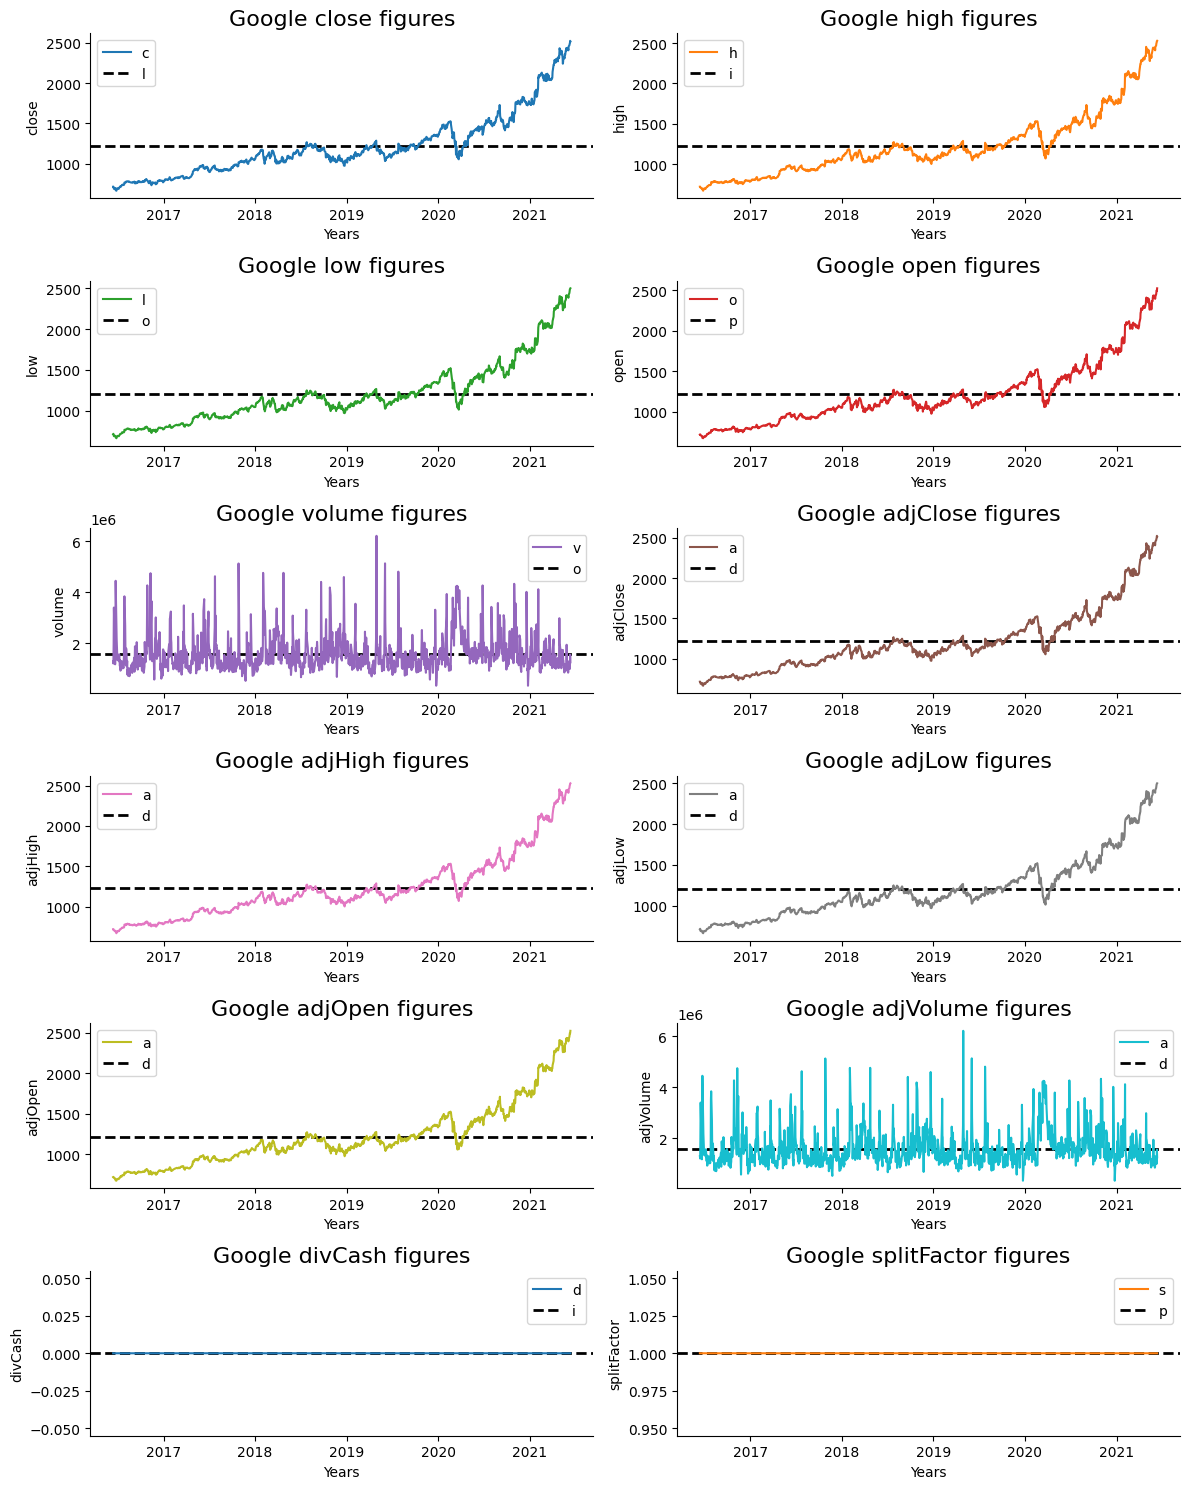

In [113]:
color=plt.rcParams["axes.prop_cycle"]
color_cycle = itertools.cycle(color)  # Create an iterator from the Cycler
# Calculate the number of rows and columns for subplots
num_cols = 2  # Adjust the number of columns as needed
num_rows = math.ceil(len(DF.columns) / num_cols)  # Calculate rows based on columns

fig=plt.figure(figsize=(12,15),dpi=100)
for i in range(0,len(DF.columns)):
  color = next(color_cycle)["color"]  # Get the next color from the iterator
  plt.subplot(num_rows,num_cols,i+1)
  plt.plot(DF[DF.columns[i]],color=color)
  plt.gca().spines['right'].set_visible(False) # Hide right border
  plt.gca().spines['top'].set_visible(False) # Hide top border

  #draw a horizontal line
  plt.axhline(DF[DF.columns[i]].mean(),linestyle='--',lw=2,zorder=1,color='black')
  plt.title("Google " + DF.columns[i] +" figures",fontsize=16)
  plt.xlabel("Years")
  plt.ylabel(DF.columns[i])
  plt.legend(DF.columns[i])
  plt.tight_layout()
plt.show()



In [114]:
training_set=DF[:'2020'].iloc[:0:1].values #Selects all rows up to and including the year 2020.
test_set=DF['2020':].iloc[:0:1].values #Selects all rows from 2020 onward.

In [115]:
training_set

array([], shape=(0, 12), dtype=float64)

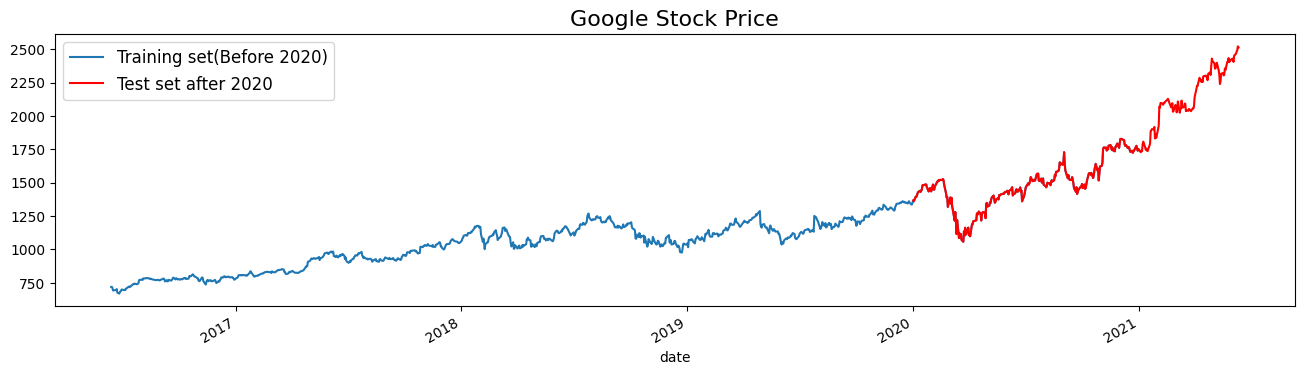

In [116]:
DF['close'][:'2020'].plot(figsize=(16,4),legend=True)
DF['close']['2020':].plot(figsize=(16,4),legend=True,color='r' )
plt.legend(['Training set(Before 2020)','Test set after 2020'],fontsize=12)
plt.title('Google Stock Price',fontsize=16)
plt.show()


In [136]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = DF[:'2020'].values # Corrected line to select all rows before 2020
test_set=DF['2020':].values
training_set_scaled = sc.fit_transform(training_set)
timesteps =60  # Using the past 60 time steps to predict the future

In [137]:
#transforms the dataset into input-output pairs for supervised learning
X_train = []  # Input sequences (past values)
y_train = []  # Output values (future value)
for i in range(timesteps , 1147):  # Loop through the dataset
    X_train.append(training_set_scaled[i - timesteps :i, 0])  # Last 'timestamp' values
    y_train.append(training_set_scaled[i, 0])  # The target value (next step)

X_train, y_train = np.array(X_train), np.array(y_train)  # LSTMs require NumPy arrays, so we convert the lists to arrays


In [86]:
X_train.shape


(1087, 60)

In [128]:
y_train.shape

(1087,)

In [138]:
# X_train.shape[0] → The number of samples (e.g., 1087).
# X_train.shape[1] → The number of time steps (e.g., 60).
# 1 → The number of features (each value is a single feature, like stock price).
np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)).shape

X_train

array([[0.04312211, 0.04368258, 0.03630155, ..., 0.08898623, 0.09641899,
        0.09665181],
       [0.04368258, 0.03630155, 0.02022885, ..., 0.09641899, 0.09665181,
        0.09231459],
       [0.03630155, 0.02022885, 0.02194476, ..., 0.09665181, 0.09231459,
        0.07881145],
       ...,
       [0.681331  , 0.70512964, 0.6770369 , ..., 0.9175584 , 0.92313728,
        0.9552482 ],
       [0.70512964, 0.6770369 , 0.68294344, ..., 0.92313728, 0.9552482 ,
        0.94027058],
       [0.6770369 , 0.68294344, 0.70505204, ..., 0.9552482 , 0.94027058,
        0.923715  ]])

In [130]:
Total_DataSet=pd.concat((DF['close'][:'2020'],DF['close']['2020':]),axis=0)
input=Total_DataSet[len(Total_DataSet)-len(test_set)-60:].values

In [139]:
dataset_total = pd.concat((DF[:'2020'], DF['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# Reshape to have 12 features (assuming your original data had 12 features)
inputs = inputs.reshape(-1, 12)  # Reshape to match the number of features used during fitting
inputs = sc.transform(inputs)


In [140]:
dataset_total

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [142]:
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [143]:
#LSTM Model
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))
Model.add(Dense(units = 1))
Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,553 (1.09 MB)

 Trainable params: 284,553 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [145]:
epochs = 15
batch_size = 32

In [146]:
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.0000e+00 - loss: 0.0689
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 1.6609e-04 - loss: 0.0057
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 2.6184e-04 - loss: 0.0048
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 1.0753e-04 - loss: 0.0033
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 2.2877e-04 - loss: 0.0039
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 2.9618e-04 - loss: 0.0032
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.0015 - loss: 0.0034
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 5.2569e-05 - loss: 0.0034
Epoch 9/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 5.2569e-05 - loss: 0.0026
Epoch 10/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 6.8477e-04 - loss: 0.0030
Epoch 11/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.0013 - loss: 0.0024
Epoch 12/1

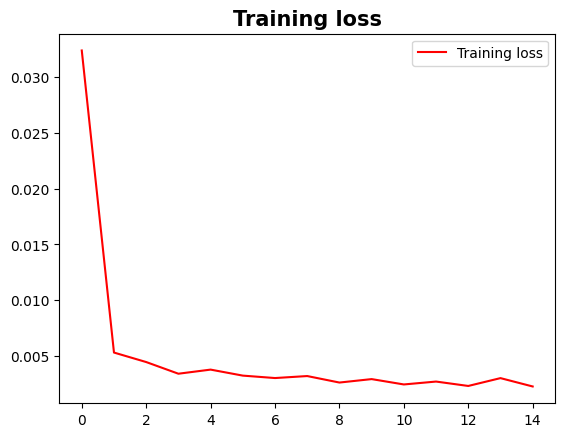

<Figure size 640x480 with 0 Axes>

In [147]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [151]:
predicted_stock_price = Model.predict(X_test)
# Reshape predicted_stock_price to have a single feature in the second dimension
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
# Create a dummy array with the same number of columns as the original dataset
# and fill it with the predicted 'close' values
num_original_features = 12  # Replace with the actual number of features in your original dataset
dummy_array = np.zeros((predicted_stock_price.shape[0], num_original_features))
dummy_array[:, 0] = predicted_stock_price[:, 0]  # Fill the 'close' column

# Inverse transform the dummy array
predicted_stock_price = sc.inverse_transform(dummy_array)

# Extract the 'close' price from the inverse transformed array
predicted_stock_price = predicted_stock_price[:, 0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


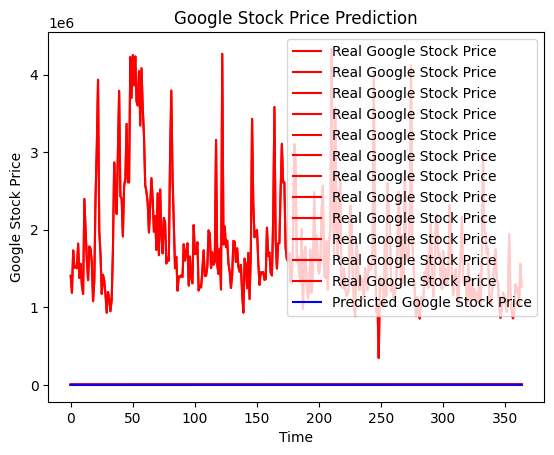

In [152]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()
plot_predictions(test_set, predicted_stock_price)